In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

In [5]:
n_samples = 1000

In [7]:
height = np.random.normal(170, 10, n_samples)

In [9]:
age = np.random.randint(18, 80, n_samples)

In [11]:
exercise = np.random.randint(0, 8, n_samples)

In [13]:
noise = np.random.normal(0, 5, n_samples)  # noise with std=5
weight = 0.5 * height + 0.2 * age - 1.5 * exercise + noise

In [15]:
data = pd.DataFrame({
    'height': height,
    'age': age,
    'exercise': exercise,
    'weight': weight
})

print('Data head:')
print(data.head())

Data head:
       height  age  exercise      weight
0  174.967142   72         2   99.544254
1  168.617357   61         2  100.161764
2  176.476885   66         1  100.915319
3  185.230299   57         4  102.977453
4  167.658466   28         4   83.108882


In [17]:
print('\
Missing values per column:')
print(data.isnull().sum())

Missing values per column:
height      0
age         0
exercise    0
weight      0
dtype: int64


In [19]:
X = data[['height', 'age', 'exercise']]
y = data['weight']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [27]:
print('\
Mean Squared Error on test set:')
print(mse)

Mean Squared Error on test set:
26.611884101705144


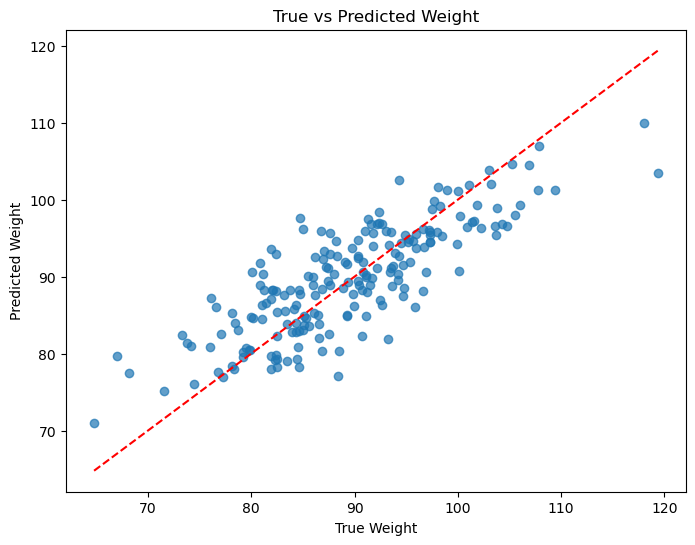

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('True Weight')
plt.ylabel('Predicted Weight')
plt.title('True vs Predicted Weight')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()